<a href="https://colab.research.google.com/github/abdyraman/canadian-tire/blob/main/newprice_prediction_CanadianTire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# import hvplot.pandas
import numpy as np

Clustering

In [3]:
# Replace the file path with the correct location of the Excel file on your system
file_path = "cantire_df.csv"
# Read the Excel file into a Pandas DataFrame
df_ctire_raw = pd.read_csv(file_path)


In [5]:
# Set the index of the DataFrame using the specified column
df_ctire_raw.index = df_ctire_raw['name']
# Create a new DataFrame by dropping the specified column
df_ctire_indexed = df_ctire_raw.drop(columns=['name'])


In [6]:
# Create a DataFrame with the scaled data
scaler = StandardScaler()
# Extract the columns you want to scale
columns_to_scale = df_ctire_indexed[['new_price','old_price','stars','observations','Savings','discount']]
scaled_data = scaler.fit_transform(columns_to_scale)

In [7]:
# Create a DataFrame with the scaled data
df_ctire_scaled = pd.DataFrame(
    scaled_data,
    columns=['new_price','old_price','stars','observations','Savings','discount']
)
# Copy the occupation group names from the original data
df_ctire_scaled["name"] = df_ctire_indexed.index
# Set the "Job areas" column as the index
df_ctire_scaled = df_ctire_scaled.set_index("name")
# Drop the row at index label 0
df_ctire_scaled = df_ctire_scaled.drop(df_ctire_scaled.index[0])
df_ctire_scaled.sample(10)

,new_price,old_price,stars,observations,Savings,discount
name,,,,,,
"PureSnacks Freeze Dried Beef Liver Dog Treats, 410-g",-0.453342,-0.529459,1.148846,-0.256791,-0.286821,-0.012165
"Breville Bambino™ Espresso Machine, Brushed Stainless Steel",1.764508,1.331196,0.071911,-0.220418,0.198658,0.022539
"Wilton Gourmet Choice Non-Stick Large Loaf Pan, 9.25 x 5.25 x 2.75-in",-0.516259,-0.546930,0.969357,-0.246871,-0.255786,0.091947
"Ninja Premium Stainless Steel Forged Knife Block Set with Sharpener, 12-pc",1.043576,1.112810,1.148846,-0.212151,0.531177,0.085007
"PADERNO Dutch Oven, Durable Cast Iron, Oven Safe, Red, 5qt",-0.005053,0.676036,0.789868,-0.283244,0.863697,0.196060
"Mastercraft Floor Squeegee with Rubber Blade, 24-in",-0.379938,-0.455208,-0.646046,-0.298124,-0.254678,0.022539
"Lagostina Ticino Stainless Steel Cookware Set & Oven Safe, 10-pc",0.388183,1.986357,0.000000,0.000000,2.193776,0.213412
type A Align 3-Tier Vertical Folding Storage Rack with Wheels,-0.201671,-0.241189,-0.287068,-0.357643,-0.133862,0.067654
"Petco Dual Purpose Décor and Comfort Pet Pillow and Bed, Washable, 35-in x 44-in, Assorted Colours",-0.280318,-0.284866,-0.825535,-0.134446,-0.122778,0.091947


In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch

In [9]:
# Create a list to store inertia values and the values of k
inertia = []
# Create a list to set the range of k values to test
k = list(range(1, 11))

In [10]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the "customers_df" DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_ctire_scaled)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [11]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,4462.743229
1,2,3463.381500
2,3,2514.644106
3,4,1998.070993
4,5,1640.660043


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

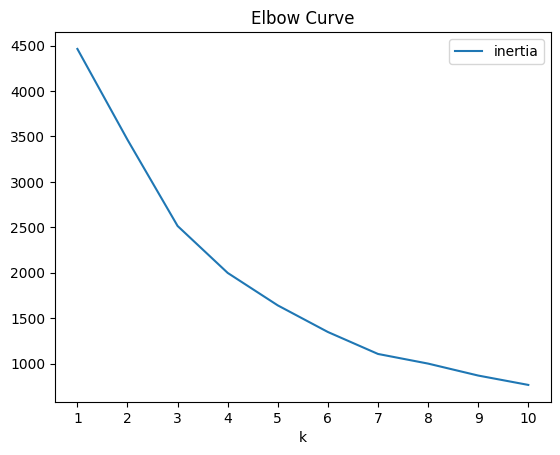

In [12]:
# Plot the DataFrame to identify the optimal value for k
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

Segment the data with K-means using the optimal number of clusters, AgglomerativeClustering and Birch

In [13]:
# Define the model with optimal number of clusters
model = KMeans(n_clusters=6, random_state=1)
# Fit the model
model.fit(df_ctire_scaled)
# Make predictions
kmeans_predictions = model.predict(df_ctire_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
agglo_model = AgglomerativeClustering(n_clusters=6)
agglo_predictions = agglo_model.fit_predict(df_ctire_scaled)

In [15]:
birch_model = Birch(n_clusters=6)
birch_model.fit(df_ctire_scaled)
birch_predictions = birch_model.predict(df_ctire_scaled)

In [16]:
# Create a copy of the customers_df DataFrame
ctire_predictions_df = df_ctire_scaled.copy()
# Add class columns with the labels to the new DataFrame
ctire_predictions_df["kmeans-segments"] = kmeans_predictions
ctire_predictions_df["agglomerative-segments"] = agglo_predictions
ctire_predictions_df["birch-segments"] = birch_predictions

In [17]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 12.8 MB/s eta 0:00:00


In [18]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

# Assuming women_predictions_df is your DataFrame containing the data

# Create the scatter plot using hvplot
scatter_plot = ctire_predictions_df.hvplot.scatter(
    x='discount',
    y='old_price',
    c="kmeans-segments",
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel="Old price",
    clim=(ctire_predictions_df["kmeans-segments"].min(), ctire_predictions_df["kmeans-segments"].max()),
    width=600,
    height=400,
    hover_cols=["kmeans-segments", "additional-column-1", "additional-column-2"],  # Add columns you want to display in tooltips
    tools=['hover'],  # Show only hover tool for tooltips
)

# Show the scatter plot
scatter_plot

:Scatter   [discount]   (old_price,kmeans-segments)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
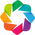

:Scatter   [discount]   (old_price,birch-segments)

In [19]:
hv.extension('bokeh')
# Create the scatter plot using hvplot
scatter_plot = ctire_predictions_df.hvplot.scatter(
    x='discount',
    y='old_price',
    c="birch-segments",
    cmap='rainbow',
    alpha=0.7,
    colorbar=True,
    ylabel="Old price",
    clim=(ctire_predictions_df["birch-segments"].min(), ctire_predictions_df["birch-segments"].max()),
    width=600,
    height=400,
    hover_cols=["birch-segments", "additional-column-1", "additional-column-2"],  # Add columns you want to display in tooltips
    tools=['hover'],  # Show only hover tool for tooltips
)

# Show the scatter plot
scatter_plot

Use the calculate PCA DataFrame in Step 6 to create a new DataFrame called, then add an additional column to the DataFrame that contains the tickers from the originalDataFrame.

In [20]:
# Create the PCA model instance where n_components=2
pca = PCA(n_components=6)

In [21]:
# Fit the df_stocks_scaled data to the PCA
ctire_pca_data = pca.fit_transform(df_ctire_scaled)

In [22]:
# Calculate the explained variance
pca.explained_variance_ratio_

array([3.27235195e-01, 3.13377766e-01, 1.71725704e-01, 1.27569832e-01,
       6.00488468e-02, 4.26561793e-05])

The pca.explained_variance_ratio_ attribute in scikit-learn's PCA (Principal Component Analysis) instance represents the proportion of variance explained by each of the selected principal components.

In the provided array:

The first element (0.377821173) indicates that the first principal component explains approximately 37.78% of the total variance in the data.

The second element (0.209929571) indicates that the second principal component explains approximately 20.99% of the total variance.

The third element (0.183131760) indicates that the third principal component explains approximately 18.31% of the total variance, and so on for the subsequent components.

8% and 1%

In [23]:
import numpy as np
# Fit the PCA model to your data
pca.fit(df_ctire_scaled)
# Get the loadings (coefficients) for each feature
loadings = pca.components_
# Determine the absolute magnitude of the loadings
absolute_loadings = np.abs(loadings)
# Find the most important feature for each component
most_important_features = np.argmax(absolute_loadings, axis=1)
# Print the most important features for each component
for component, feature_idx in enumerate(most_important_features):
    feature_name = df_ctire_scaled.columns[feature_idx]
    print(f"Component {component+1}: Most important feature is {feature_name}")

Component 1: Most important feature is old_price
Component 2: Most important feature is new_price
Component 3: Most important feature is observations
Component 4: Most important feature is stars
Component 5: Most important feature is discount
Component 6: Most important feature is old_price


In [24]:
# Import numpy and pandas package
import pandas as pd
import numpy as np
# Data visualization
from matplotlib import pyplot as plot
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df_ctire_indexed = df_ctire_raw.drop(columns=['name'])
df_ctire_indexed

,new_price,old_price,stars,observations,Savings,discount
name,,,,,,
"For Living 30 Pint 2-Speed Dehumidifier, Bucket/Continuous Drain, ENERGY STAR® Certified, White",219.99,279.99,4.4,182.0,60.0,0.21
"For Living 6-ft Portable Plastic & Metal Folding Table with Handle, Grey",59.99,79.99,4.3,260.0,20.0,0.25
Tineco iCarpet Portable Lightweight Upright Carpet Vacuum Cleaner,149.99,499.99,4.3,61.0,350.0,0.70
"Sauder 3-Door Wardrobe/Armoire Clothes Storage Cabinet With Hanger Rod & Shelves, Cinnamon",279.99,359.99,4.0,32.0,80.0,0.22
"iRobot® Roomba® 691 Robot Vacuum – Self Charging, Wi-Fi Connected, Good for Pet Hair",229.99,499.99,4.2,222.0,270.0,0.54
...,...,...,...,...,...,...
"NOMA Indoor Single Tube LED Light Bar with Motion Sensor, 5000 Lumens, 4-ft, Daylight, 50W",82.49,164.99,3.7,9.0,82.5,0.50
"PADERNO Richmond Satin Stainless Steel Flatware Set, Serves 4, 20-pc",49.99,129.99,4.4,39.0,80.0,0.62
OttLite Task Flashlight & Clip Lamp,29.99,39.99,3.7,3.0,10.0,0.25


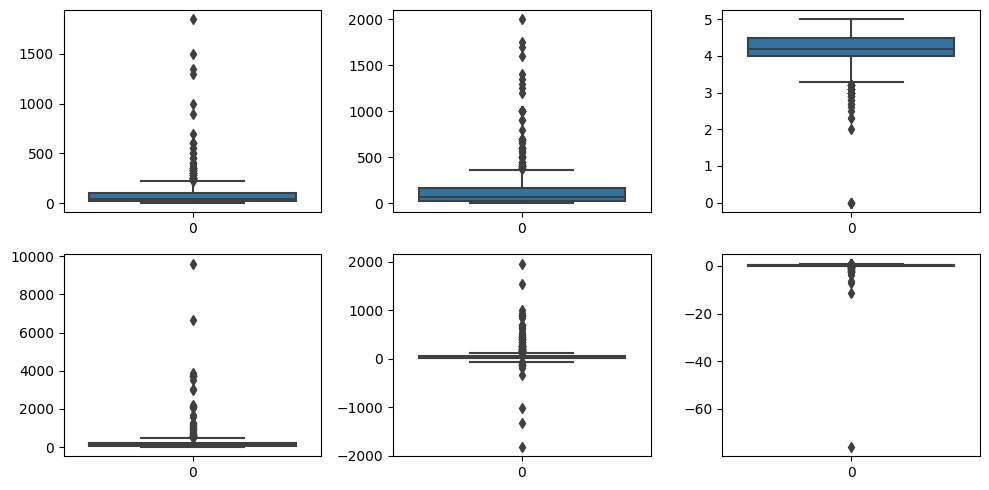

In [26]:
def detectOutliers():
    fig, axs = plot.subplots(2,3, figsize = (10,5))
    plt1 = sns.boxplot(df_ctire_indexed['new_price'], ax = axs[0,0])
    plt2 = sns.boxplot(df_ctire_indexed['old_price'], ax = axs[0,1])
    plt3 = sns.boxplot(df_ctire_indexed['stars'], ax = axs[0,2])
    plt1 = sns.boxplot(df_ctire_indexed['observations'], ax = axs[1,0])
    plt2 = sns.boxplot(df_ctire_indexed['Savings'], ax = axs[1,1])
    plt3 = sns.boxplot(df_ctire_indexed['discount'], ax = axs[1,2])
    plot.tight_layout()
detectOutliers()

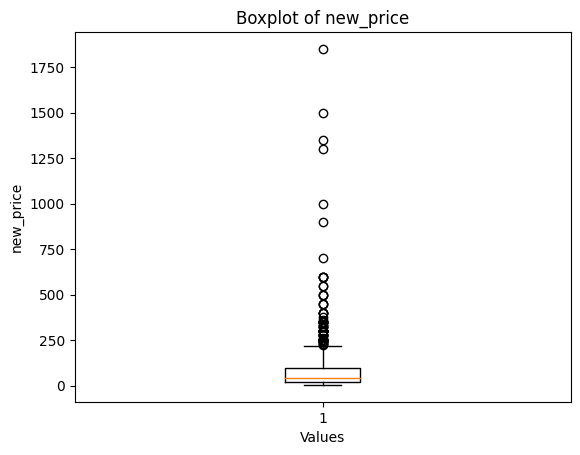

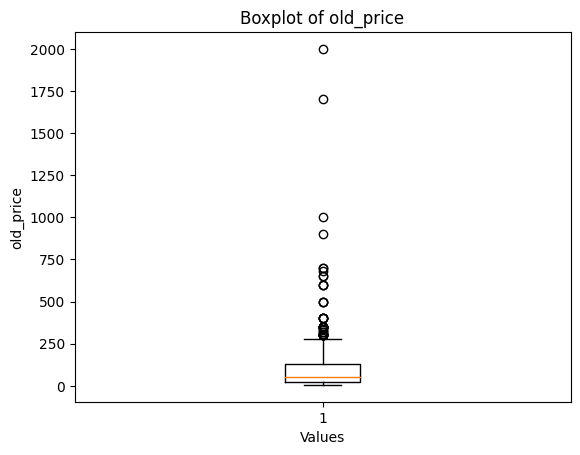

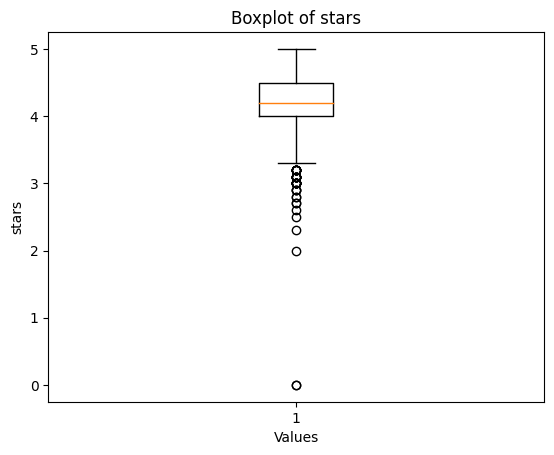

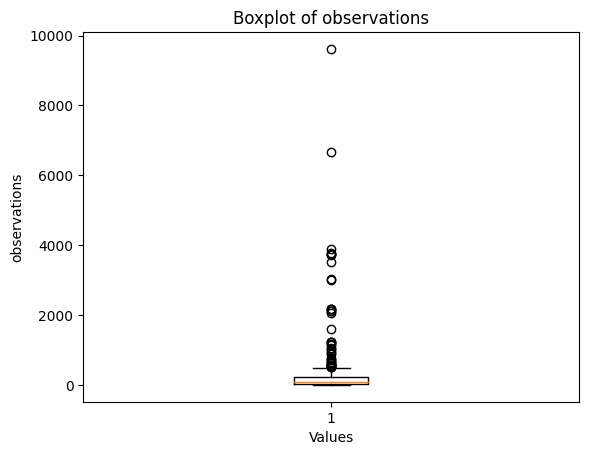

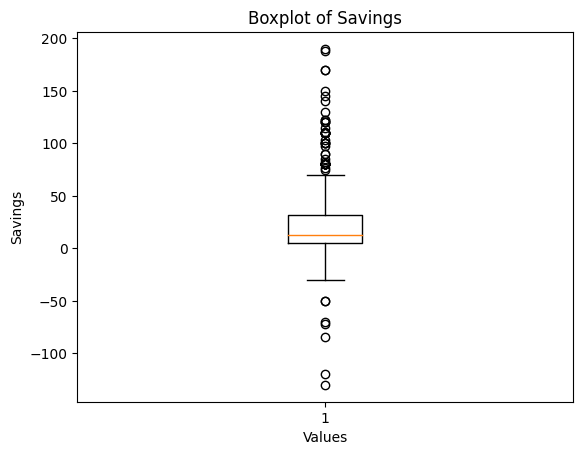

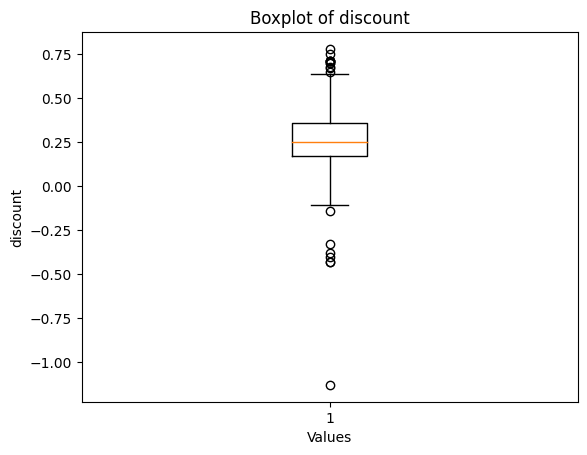

In [27]:
def filter_outliers(df, column_name):
    # Plot a boxplot to visualize the distribution and outliers
    plt.boxplot(df[column_name])
    plt.xlabel('Values')
    plt.ylabel(column_name)
    plt.title(f'Boxplot of {column_name}')
    plt.show()

    # Calculate the first and third quartiles (Q1 and Q3) and the interquartile range (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Filter the DataFrame to remove outliers
    df_filtered = df[(df[column_name] >= Q1 - 1.5 * IQR) & (df[column_name] <= Q3 + 1.5 * IQR)]
    return df_filtered

# Call the function to filter outliers for the columns
df_ctire_filtered = filter_outliers(df_ctire_indexed, 'new_price')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'old_price')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'stars')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'observations')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'Savings')
df_ctire_filtered = filter_outliers(df_ctire_filtered, 'discount')

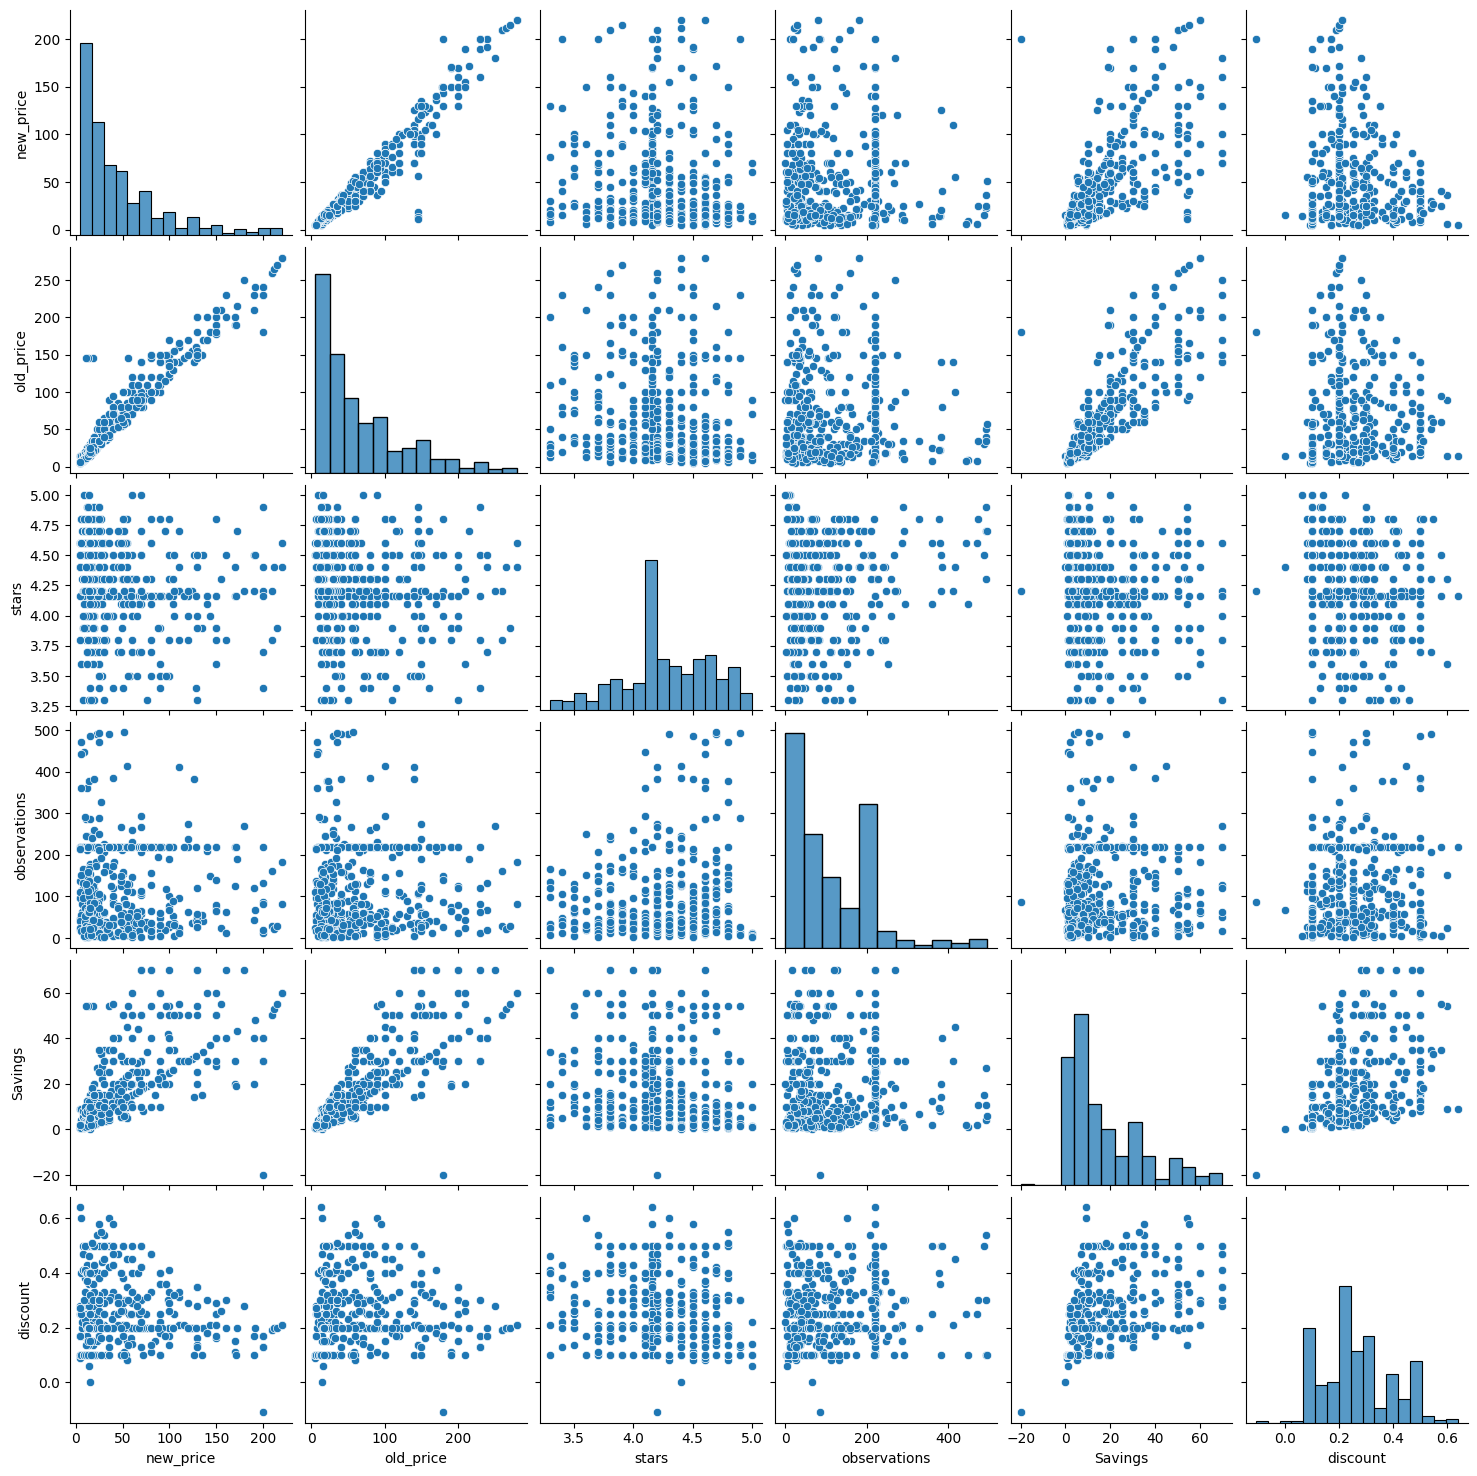

In [28]:
sns.pairplot(df_ctire_filtered)
plot.show()

In [29]:
Y = df_ctire_filtered.new_price
# includes the fields other than prices
X = df_ctire_filtered.iloc[:,1:]

In [30]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
def preprocessing(X):
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)

In [31]:
preprocessing(X)

         VIF      Features
0  10.982278     old_price
1   4.187144         stars
2   2.210514  observations
3  36.768252       Savings
4  15.808710      discount


As a thumb rule, a VIF value greater than 5 means very severe multicollinearity. From the above savings and discount having severe collinearity.

In [32]:
X.drop(['Savings','discount'], axis=1, inplace=True)
preprocessing(X)

        VIF      Features
0  1.691480     old_price
1  2.388313         stars
2  2.052245  observations


<ipython-input-32-a144a27ef228>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Savings','discount'], axis=1, inplace=True)


In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=355)

In [34]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [35]:
y_predict = regression.predict(x_test)

In [36]:
import statsmodels.api as sms
model_1 = sms.OLS(y_train, x_train).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              new_price   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              2875.
Date:                Wed, 27 Sep 2023   Prob (F-statistic):                   1.48e-250
Time:                        19:38:38   Log-Likelihood:                         -1437.1
No. Observations:                 362   AIC:                                      2880.
Df Residuals:                     359   BIC:                                      2892.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
old_price        0.7314      0.011     64.070      0.000       0.709       0.754
stars           -0.5505      0.294     -1.869      0.062      -1.130       0.029
observations     0.0093      0.007      1.339      0.181      -0.004       0.023
==============================================================================
Omnibus:                      262.945   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7270.827
Skew:                          -2.644   Prob(JB):                         0.00
Kurtosis:                      24.309   Cond. No.                         68.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: ignored

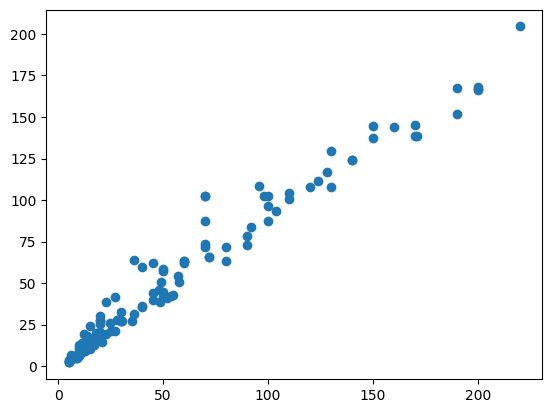

In [37]:
plot.scatter(y_test,y_predict)
fig.suptitle('y_test vs y_pred', fontsize=20)
plot.xlabel('y_test', fontsize=18)
plot.ylabel('y_pred', fontsize=16)